# Problem Statment:
    1. Loan Eligibility
    2. Loan Amount for whose loan approval reject

# Problem Statement 1: Loan Eligibility

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from warnings import filterwarnings
filterwarnings("ignore")

# Read Data

In [2]:
train = pd.read_csv("C:/Users/AYUSH/Desktop/Dataset/Loan Project/training_set.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


# Profile

In [4]:
train.shape

(614, 13)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,613.000000,592.000000,600.00000,564.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199
std,6118.914057,2928.624748,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Drop unnecessary Columns

In [7]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      504
CoapplicantIncome    286
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [8]:
train = train.drop(labels="Loan_ID",axis=1)

# Find and Replace Missing Data

In [9]:
train.isna().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
def Replace_nan(df):
    Q=pd.DataFrame(df.isna().sum(),columns=["Count_null"])
    for i in Q[Q.Count_null>0].index:
        if(df[i].dtypes == "object"):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)
        else:
            y = round(df[i].mean(),4)
            df[i] = df[i].fillna(y)

In [11]:
Replace_nan(train)

# Define X and Y

In [106]:
X = train.drop(labels="Loan_Status",axis=1)
Y = train[["Loan_Status"]]

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = pd.DataFrame(le.fit_transform(Y.Loan_Status),columns=["Loan_Status"])

# Separate Catograical and Continuous 

In [14]:
def catconsep(df):
    cat=[]
    con=[]
    for i in df.columns:
        if(df[i].dtypes=='object'):
            cat.append(i)
        else:
            con.append(i)
    return cat,con

In [15]:
cat,con = catconsep(X)

In [16]:
X[cat].head(2)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural


In [17]:
X[con].head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0000,0.0,146.4122,360.0,1.0
1,5405.5408,1508.0,128.0000,360.0,1.0


# Find and Remove Skew

In [18]:
X.skew().sort_values()

Loan_Amount_Term    -2.389680
Credit_History      -1.963601
LoanAmount           2.726601
ApplicantIncome      6.538870
CoapplicantIncome    7.492000
dtype: float64

In [19]:
cols_skew = ["Loan_Amount_Term","Credit_History","ApplicantIncome","CoapplicantIncome","LoanAmount"]

In [20]:
for i in cols_skew:
    for j in range(0,614,1):
        if(X[[i]].iloc[j,0]==0):
            X[[i]] = X[[i]].replace(0,0.001)
X1 = X[cols_skew].apply(np.log)

In [21]:
X = X.drop(labels=cols_skew,axis=1)
X2 = X.join(X1)

In [22]:
X2.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Amount_Term,Credit_History,ApplicantIncome,CoapplicantIncome,LoanAmount
0,Male,No,0,Graduate,No,Urban,5.886104,0.0,8.674026,-6.907755,4.986426
1,Male,Yes,1,Graduate,No,Rural,5.886104,0.0,8.595180,7.318540,4.852030
2,Male,Yes,0,Graduate,Yes,Urban,5.886104,0.0,8.006368,-6.907755,4.189655


# Exploratory Data Analysis

# Univarate

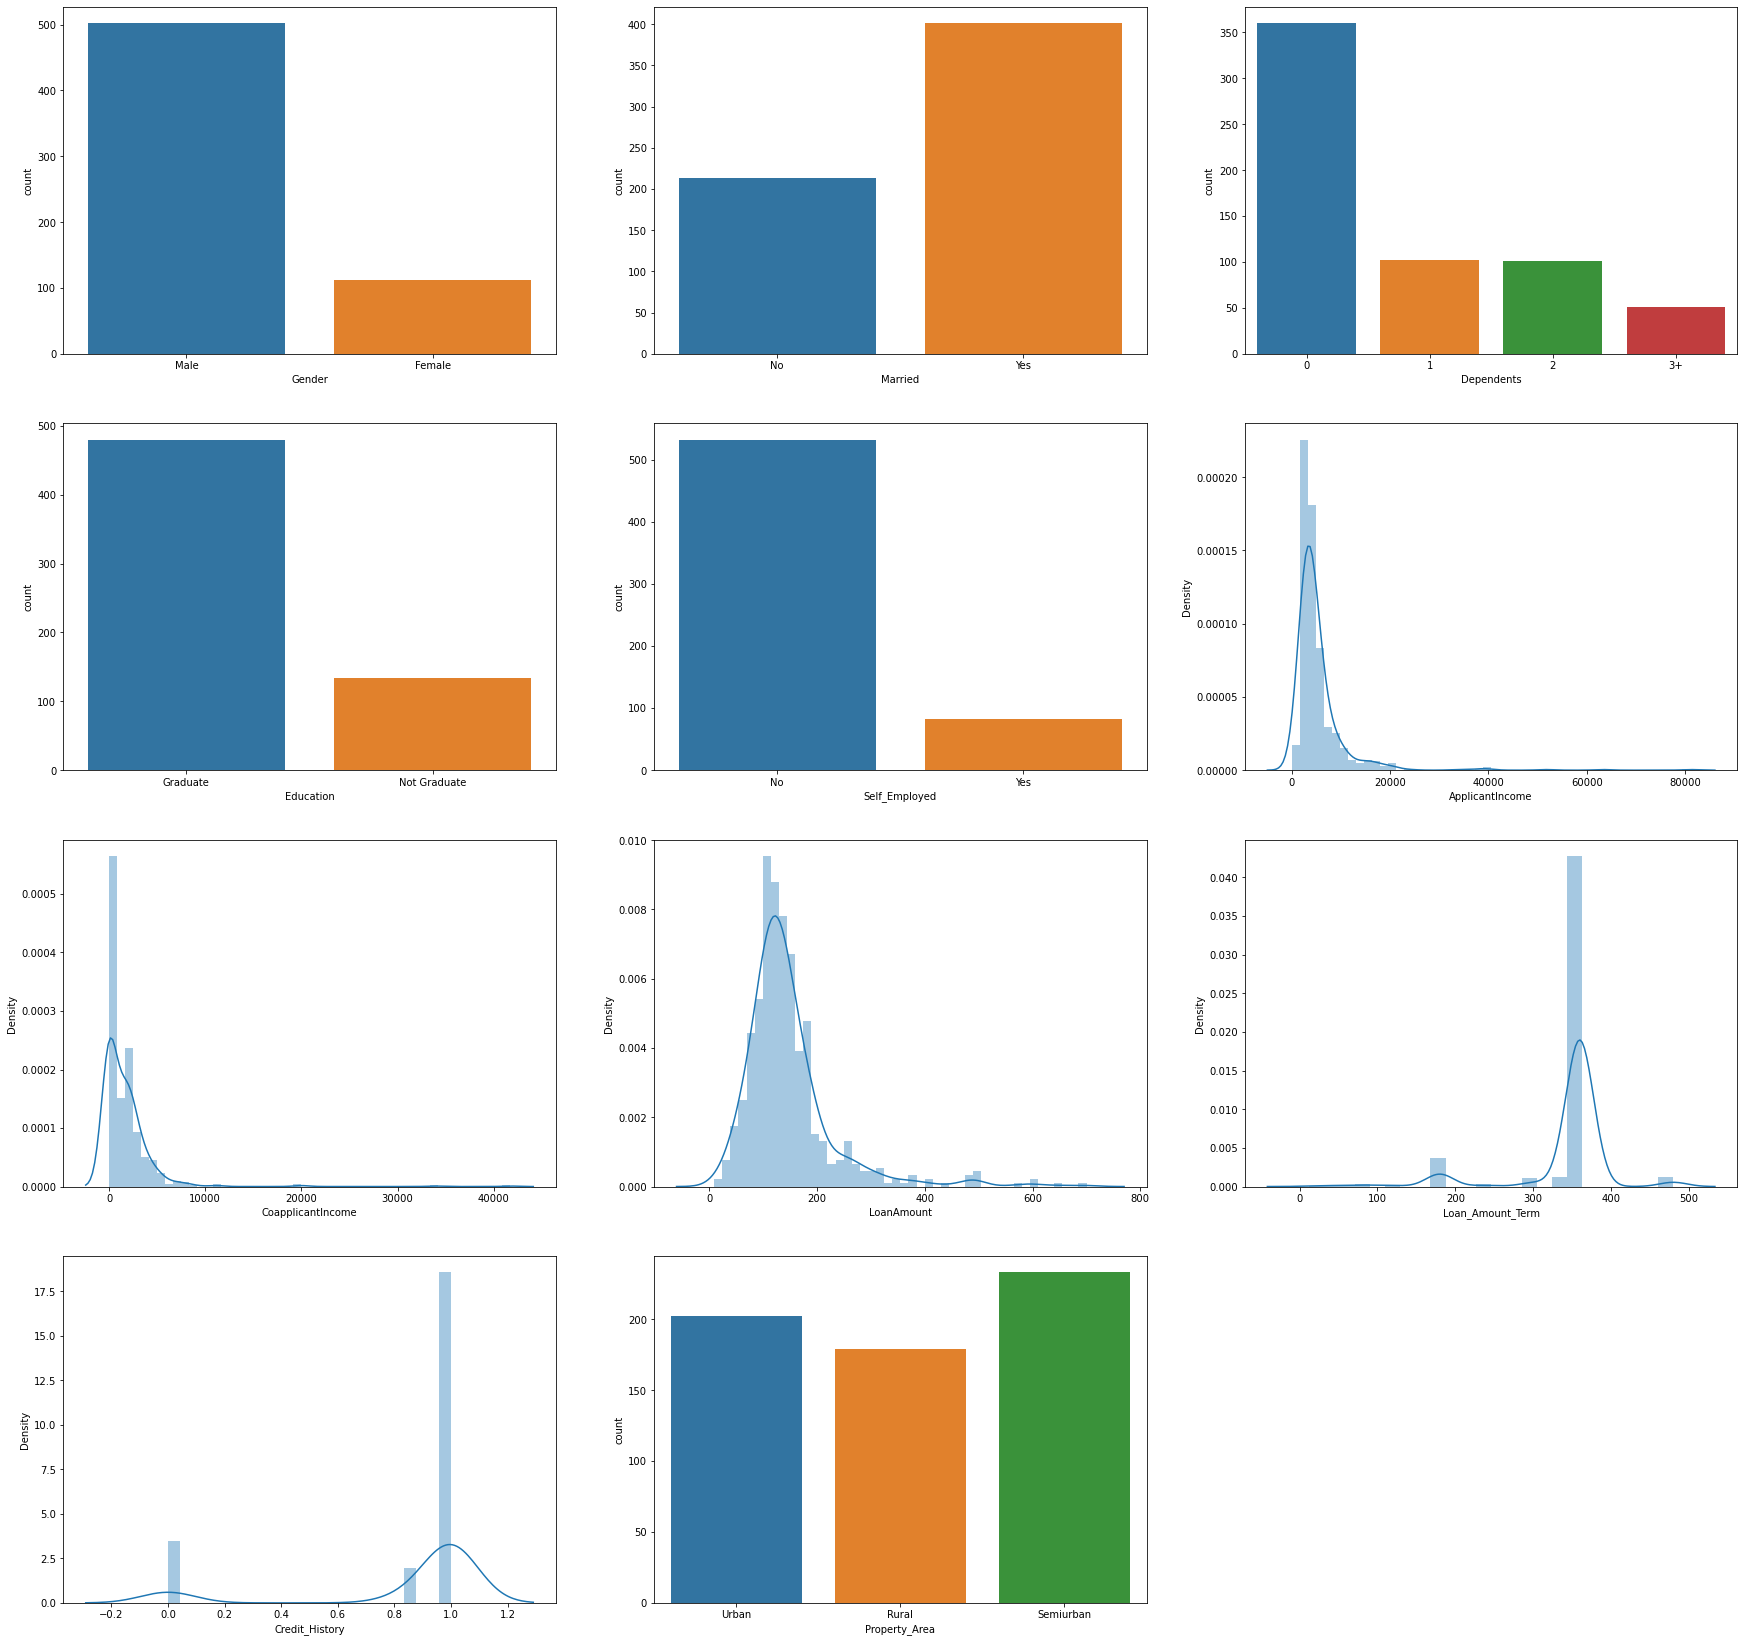

In [110]:
plt.figure(figsize=(30,60))
q = 1
for i in X.columns:
    if(X[i].dtypes=='object'):
        plt.subplot(8,3,q)
        sb.countplot(X[i])
        q = q+1
    else:
        plt.subplot(8,3,q)
        sb.distplot(X[i])
        q = q+1

# Bivarate

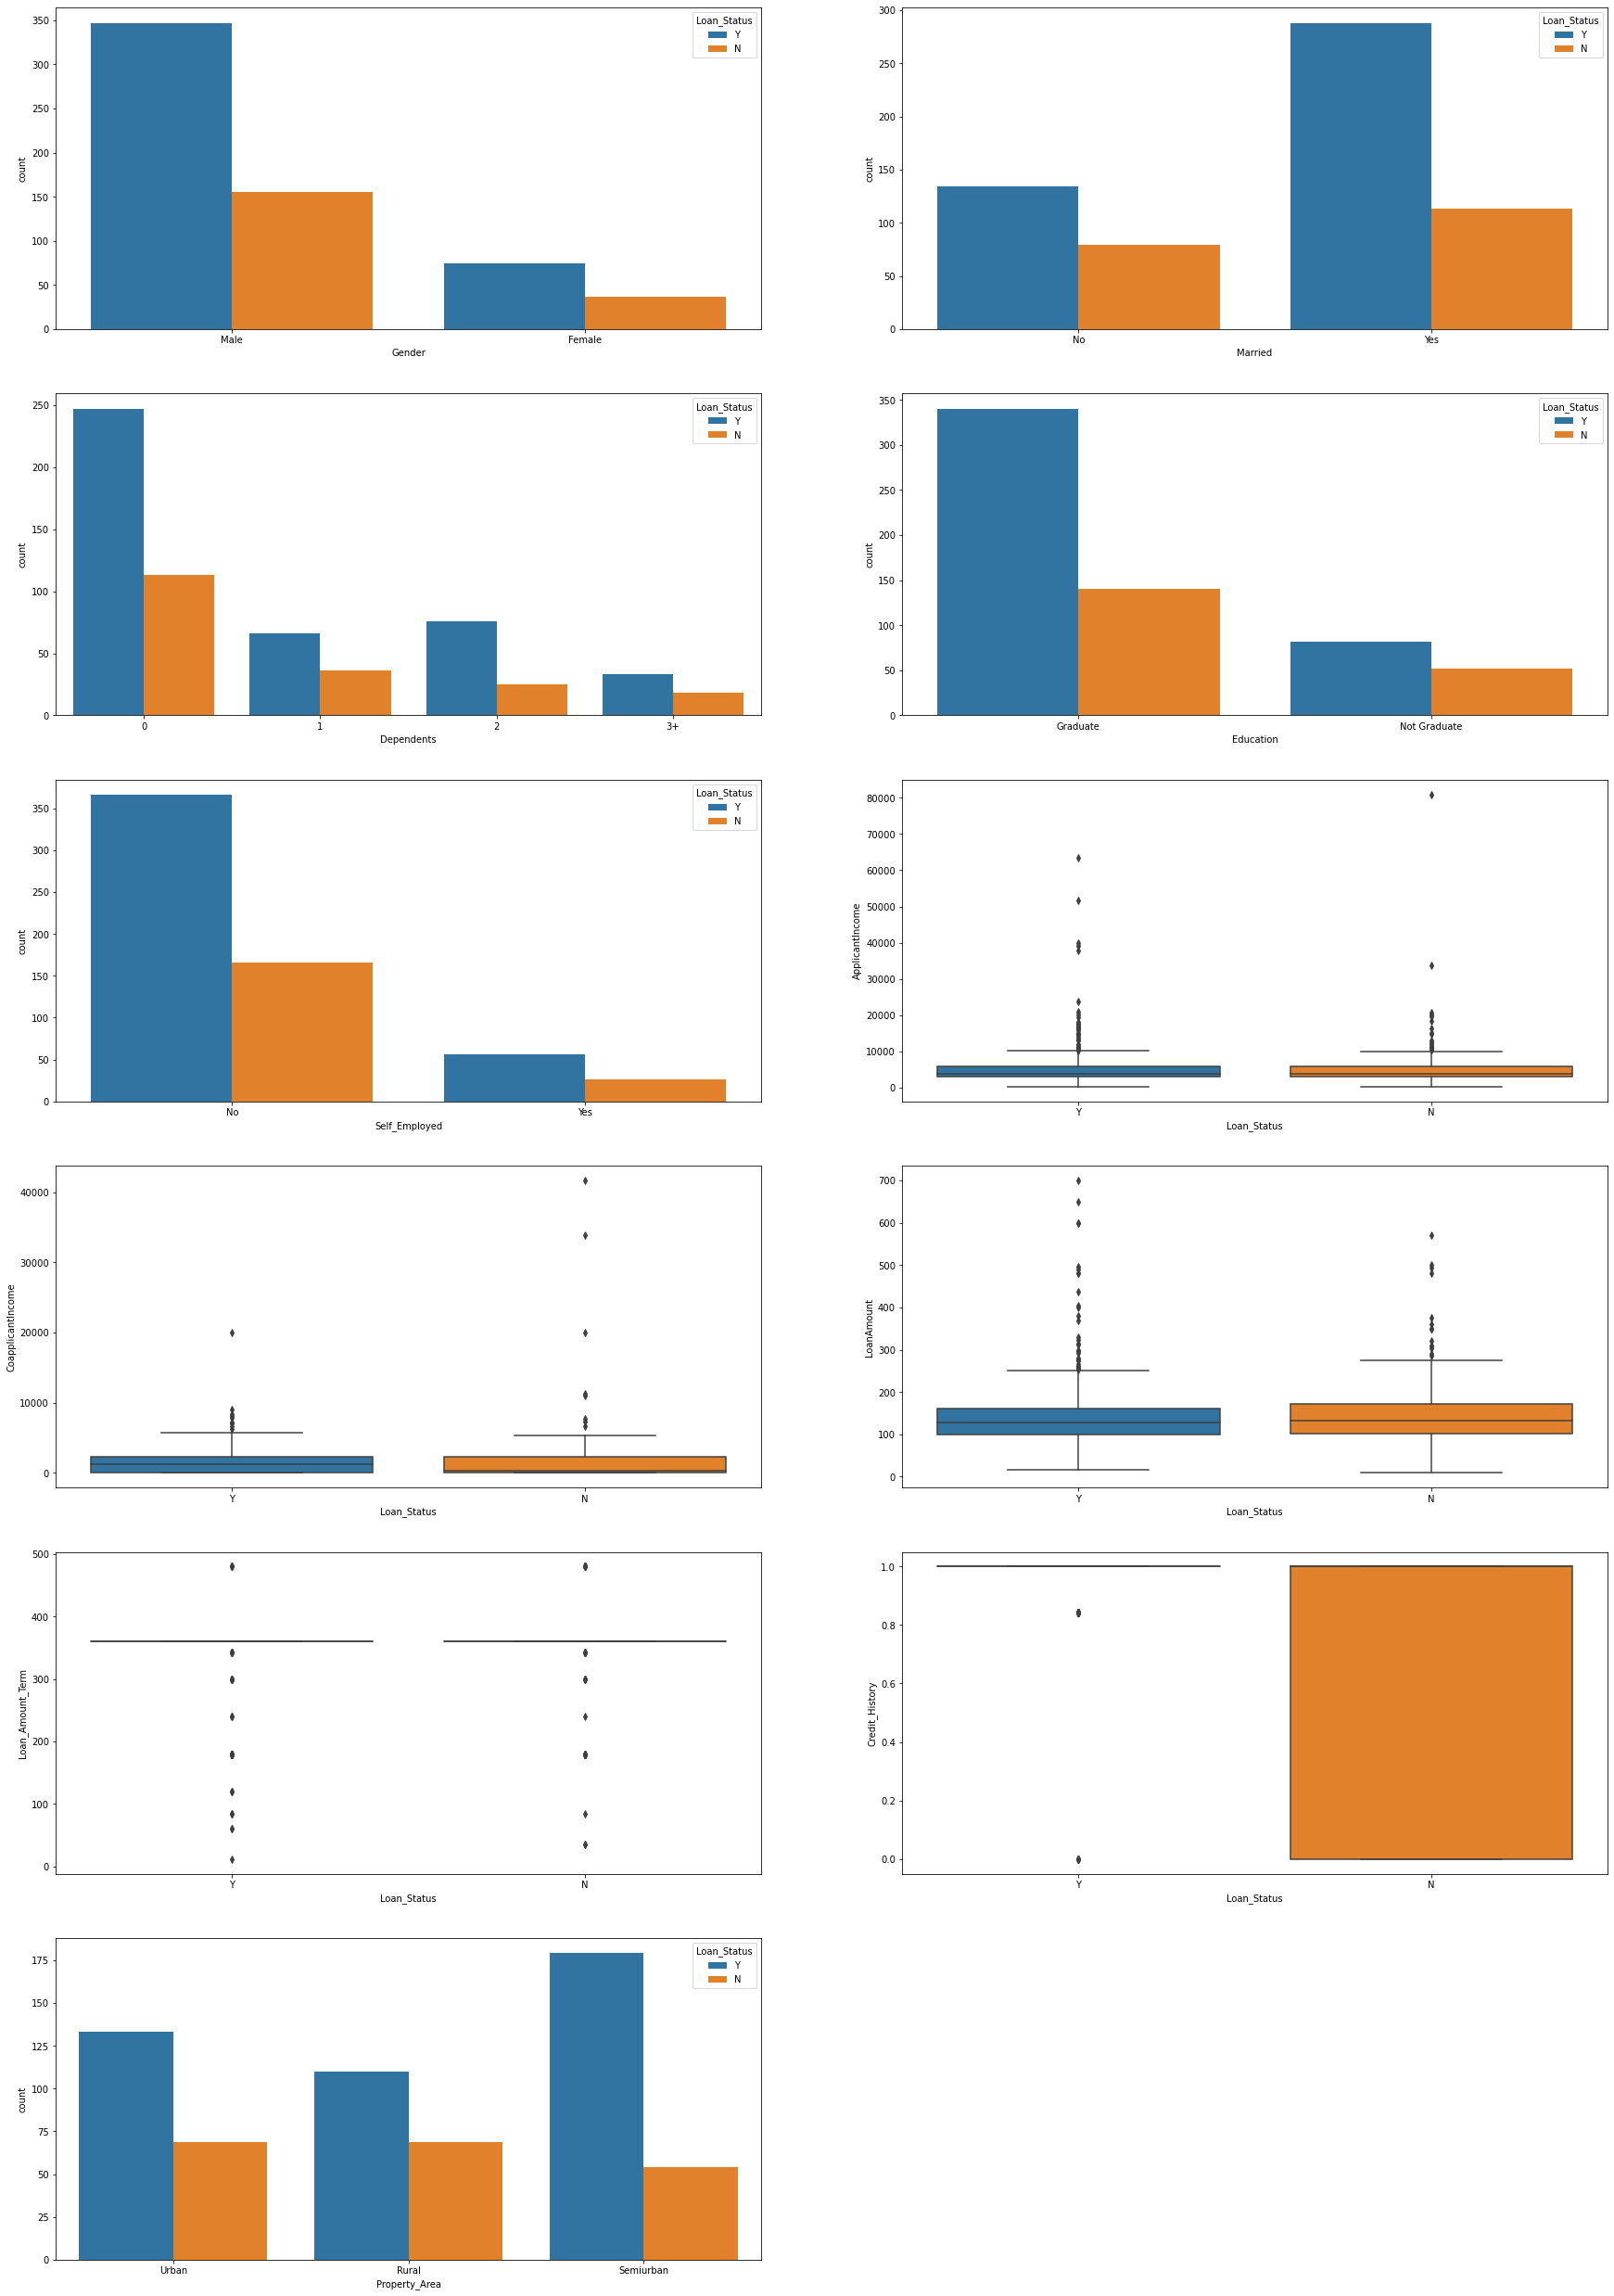

In [111]:
plt.figure(figsize=(30,60))
q = 1
for i in X.columns:
    if(X[i].dtypes=='object'):
        plt.subplot(8,2,q)
        sb.countplot(x = i,hue="Loan_Status",data = train)
        q = q+1
    else:
        
        plt.subplot(8,2,q)
        sb.boxplot(x = "Loan_Status", y = i,data = train)
        q = q+1

In [25]:
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.formula.api import ols
    rel = con + ' ~ ' + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    a = Q["PR(>F)"][cat]
    return round(a,4)

In [26]:
from scipy.stats import chi2_contingency
for i in X2.columns:
    if(X2[i].dtypes != "object"):
        print(i,ANOVA(train,"Loan_Status",i))
        print("------------------------------")
    else:
        a,b,c,d = chi2_contingency(pd.crosstab(train['Loan_Status'],train[i]))
        print(i,round(b,4))
        print("------------------------------")

Gender 0.7391
------------------------------
Married 0.0296
------------------------------
Dependents 0.3689
------------------------------
Education 0.0431
------------------------------
Self_Employed 1.0
------------------------------
Property_Area 0.0021
------------------------------
Loan_Amount_Term 0.604
------------------------------
Credit_History 0.0
------------------------------
ApplicantIncome 0.9025
------------------------------
CoapplicantIncome 0.1424
------------------------------
LoanAmount 0.3677
------------------------------


# Preprocessing

In [27]:
def preprocessing(df):
    cat,con = catconsep(df)
    import pandas as pd
    X1 = pd.get_dummies(df[cat])
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X2 = pd.DataFrame(ss.fit_transform(df[con]),columns=con)
    X3=X2.join(X1)
    return X3

In [28]:
Xnew = preprocessing(X2)

In [29]:
Xnew.head(3)

,Loan_Amount_Term,Credit_History,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.269161,0.418397,0.515465,-1.114841,0.250640,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.269161,0.418397,0.393196,0.836945,-0.020226,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,0.269161,0.418397,-0.519896,-1.114841,-1.355202,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1


# Splitting the data into Training data & Testing Data

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=42)

# Classification Models

    1. Random Forest
    2. Decision Tree Classification
    3. Logistic Regression
    4. Adaboost Regression
    5. Kneighbors Classification

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [32]:
def model(mobj):
    model = mobj.fit(xtrain,ytrain)
    from sklearn.metrics import accuracy_score
    tr_pred = model.predict(xtrain)
    tr_acc = round(accuracy_score(ytrain,tr_pred),3)
    ts_pred = model.predict(xtest)
    ts_acc = round(accuracy_score(ytest,ts_pred),3)
    return tr_acc,ts_acc,mobj

# logistic regression

In [33]:
lr = LogisticRegression()
model(lr)

(0.815, 0.789, LogisticRegression())

# Decision Tree classification

In [34]:
dtc = DecisionTreeClassifier(random_state=21)
model(dtc)

(1.0, 0.724, DecisionTreeClassifier(random_state=21))

# Random Forest Classification

In [35]:
rfc = RandomForestClassifier(random_state=31)
model(rfc)

(1.0, 0.748, RandomForestClassifier(random_state=31))

# Adaboost Classification

In [36]:
abc = AdaBoostClassifier(dtc,random_state=31)
model(abc)

(1.0,
 0.707,
 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=21),
                    random_state=31))

# KNeighbors Classification

In [37]:
knc = KNeighborsClassifier()
model(knc)

(0.827, 0.772, KNeighborsClassifier())

# Tune the hyperparameter

In [38]:
def cv_tune(mobj,tp):
    from sklearn.model_selection import GridSearchCV
    cv = GridSearchCV(mobj,tp,scoring="accuracy",cv=4)
    cvmodel = cv.fit(xtrain,ytrain)
    return cvmodel.best_params_

In [39]:
#for random forest classification
tp = {"max_depth":range(2,10,1)}
cv_tune(rfc,tp)

{'max_depth': 5}

In [40]:
rf = RandomForestClassifier(max_depth=5,random_state=31)
model(rf)

(0.827, 0.789, RandomForestClassifier(max_depth=5, random_state=31))

In [41]:
#for Decision Tree classification
for i in ["max_depth","min_samples_leaf","min_samples_split"]:
    tg = {i:range(2,30)}
    print(cv_tune(dtc,tg))

{'max_depth': 2}
{'min_samples_leaf': 21}
{'min_samples_split': 22}


In [42]:
dtc_depth = DecisionTreeClassifier(max_depth=2,random_state=21)
model(dtc_depth)

(0.821, 0.789, DecisionTreeClassifier(max_depth=2, random_state=21))

In [43]:
dtc_leaf = DecisionTreeClassifier(min_samples_leaf=21,random_state=21)
model(dtc_leaf)

(0.815, 0.764, DecisionTreeClassifier(min_samples_leaf=21, random_state=21))

In [44]:
dtc_split = DecisionTreeClassifier(min_samples_split=22,random_state=21)
model(dtc_split)

(0.874, 0.707, DecisionTreeClassifier(min_samples_split=22, random_state=21))

In [45]:
#for adaboost classification
abc = AdaBoostClassifier(dtc_depth,random_state=31)
model(abc)

(0.951,
 0.699,
 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                          random_state=21),
                    random_state=31))

In [46]:
tg = {"n_estimators":range(2,100,1)}   #for abdboost regression
cv_tune(abc,tg)

{'n_estimators': 2}

In [47]:
ABC = AdaBoostClassifier(dtc_depth,n_estimators=2,random_state=31)
model(ABC)

(0.825,
 0.789,
 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                          random_state=21),
                    n_estimators=2, random_state=31))

In [48]:
#for knn classification
TG = {"n_neighbors":range(2,30,1)}
cv_tune(knc,TG)

{'n_neighbors': 16}

In [49]:
knc = KNeighborsClassifier(n_neighbors=16)
model(knc)

(0.817, 0.789, KNeighborsClassifier(n_neighbors=16))

# Data Preparation for test Data

In [50]:
Test = pd.read_csv("C:/Users/AYUSH/Desktop/Dataset/Loan Project/testing_set.csv")

In [51]:
Test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [52]:
test = Test.drop(labels=["Loan_ID"],axis=1)

In [53]:
Replace_nan(test)

In [54]:
T = preprocessing(test)

In [55]:
T.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.429368,0.270603,0.479189,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,-0.352692,-0.029848,-0.166482,0.270603,0.479189,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,0.039641,0.098849,1.180807,0.270603,0.479189,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,-0.502774,0.418877,-0.593671,0.270603,-0.000111,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,-0.311909,-0.673335,-0.955139,0.270603,0.479189,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


# Use logistic regression model to predict loan status

In [56]:
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)

In [57]:
pred=model.predict(T)

In [58]:
Test["Predicted_Loan_Status"] = le.inverse_transform(pred)

In [59]:
Test.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predicted_Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,N
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y


In [60]:
Test.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predicted_Loan_Status
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural,N


# Problem_Statment 2: People whose loan got rejected, find loan amount he can get approve the loan

Find out whose loan got rejected from test data

In [61]:
rejects = Test[Test.Predicted_Loan_Status == "N"]

In [62]:
rejects.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predicted_Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,N
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,N
10,LP001078,Male,No,0,Not Graduate,No,3091,0,90.0,360.0,1.0,Urban,N
12,LP001083,Male,No,3+,Graduate,No,4166,0,40.0,180.0,NaN,Urban,N


# Prepare training Data

In [63]:
T1 = Test[Test.Predicted_Loan_Status == "Y"]
T2 = train[train.Loan_Status == "Y"]

In [64]:
T1.shape

(265, 13)

In [65]:
T2.shape

(422, 12)

In [66]:
T1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Predicted_Loan_Status'],
      dtype='object')

In [67]:
T2.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [68]:
T1 = T1.drop(labels="Loan_ID",axis=1)

In [69]:
T1.columns = T2.columns

In [70]:
Xnew = pd.concat([T1,T2])

In [71]:
Xnew.shape

(687, 12)

In [72]:
Xnew.index = range(0,687,1)

In [73]:
Xnew.isna().sum()

Gender                7
Married               0
Dependents            7
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            4
Loan_Amount_Term      6
Credit_History       23
Property_Area         0
Loan_Status           0
dtype: int64

In [74]:
Replace_nan(Xnew)

In [75]:
Y = Xnew[["LoanAmount"]]
X = Xnew.drop(labels=["LoanAmount"],axis=1)

In [76]:
X =preprocessing(X)

In [77]:
X.head(3)

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,-0.370774,-0.107314,0.250322,0.368719,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1
1,-0.031733,0.029419,0.250322,0.368719,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,1
2,-0.500469,0.369429,0.250322,-0.000031,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,1


In [78]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=21)

# Regression Model

    1. Random Forest Regressor
    2. Decision Tree Regressor
    3. Adaboost Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [80]:
def Model_Reg(mobj):
    model = mobj.fit(x_train,y_train)
    from sklearn.metrics import mean_absolute_error
    tr_pred = model.predict(x_train)
    tr_err = round(mean_absolute_error(y_train,tr_pred),4)
    ts_pred = model.predict(x_test)
    ts_err = round(mean_absolute_error(y_test,ts_pred),4)
    return tr_err,ts_err,mobj

# Random forest Regression

In [81]:
Rfr =RandomForestRegressor(random_state=42)
Model_Reg(Rfr)

(13.5628, 36.2419, RandomForestRegressor(random_state=42))

# Decision Tree Regression

In [82]:
dtr = DecisionTreeRegressor(random_state=31)
Model_Reg(dtr)

(0.0, 52.0393, DecisionTreeRegressor(random_state=31))

# Adaboost Regression

In [83]:
abr = AdaBoostRegressor(dtr,random_state=21)
Model_Reg(abr)

(1.7126,
 37.3377,
 AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=31),
                   random_state=21))

# Tune the hyperparameter

In [84]:
def CV(mobj,tp):
    from sklearn.model_selection import GridSearchCV
    cv = GridSearchCV(mobj,tp,scoring="neg_mean_absolute_error",cv=4)
    cvmodel = cv.fit(x_train,y_train)
    return cvmodel.best_params_

In [85]:
for i in ["max_depth","min_samples_leaf","min_samples_split"]: #decision tree
    tg = {i:range(2,50)}
    print(CV(dtr,tg))

{'max_depth': 3}
{'min_samples_leaf': 29}
{'min_samples_split': 45}


In [86]:
dtr_depth = DecisionTreeRegressor(max_depth=3,random_state=31)
Model_Reg(dtr_depth)

(35.6867, 41.8475, DecisionTreeRegressor(max_depth=3, random_state=31))

In [87]:
dtr_leaf = DecisionTreeRegressor(min_samples_leaf=29,random_state=31)
Model_Reg(dtr_leaf)

(35.3402, 37.3667, DecisionTreeRegressor(min_samples_leaf=29, random_state=31))

In [88]:
dtr_split = DecisionTreeRegressor(min_samples_split=45,random_state=31)
Model_Reg(dtr_split)

(31.0482,
 41.2398,
 DecisionTreeRegressor(min_samples_split=45, random_state=31))

In [89]:
tp = {"max_depth":range(2,10,1)}      #random forest
CV(Rfr,tp)

{'max_depth': 7}

In [90]:
rfr = RandomForestRegressor(max_depth=7,random_state=42)
Model_Reg(rfr)

(23.5963, 35.3209, RandomForestRegressor(max_depth=7, random_state=42))

In [91]:
tp = {"n_estimators":range(2,20,1)}      #adaboost Regression
CV(abr,tp)

{'n_estimators': 17}

In [92]:
abr = AdaBoostRegressor(dtr_split,n_estimators=17,random_state=31)
Model_Reg(abr)

(26.3398,
 36.5763,
 AdaBoostRegressor(base_estimator=DecisionTreeRegressor(min_samples_split=45,
                                                        random_state=31),
                   n_estimators=17, random_state=31))

# Prepare data to predict loan amount

In [93]:
rejects.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Predicted_Loan_Status'],
      dtype='object')

In [94]:
Rejects = rejects.drop(labels=["Loan_ID","LoanAmount"],axis=1)

In [95]:
Rejects.shape

(102, 11)

In [96]:
Rejects.index = range(0,102,1)

In [97]:
Rejects.isna().sum()

Gender                   4
Married                  0
Dependents               3
Education                0
Self_Employed            3
ApplicantIncome          0
CoapplicantIncome        0
Loan_Amount_Term         0
Credit_History           6
Property_Area            0
Predicted_Loan_Status    0
dtype: int64

In [98]:
Replace_nan(Rejects)

In [99]:
Xtest = preprocessing(Rejects)

# Prediction using Random Forest Regression

In [100]:
rfr = RandomForestRegressor(max_depth=7,random_state=42)
model = rfr.fit(x_train,y_train)

In [101]:
rejected_op = model.predict(Xtest)
rejected_op

array([177.82080819,  87.9944619 ,  95.1321604 ,  78.57238976,
        99.82154305, 168.76956719, 198.69076326, 101.75686852,
       112.70346524, 105.78070395, 135.14047108,  95.25693817,
       185.43194971,  97.47237664, 104.69695808, 157.12050861,
       153.08454957, 113.23805886, 110.60158751, 108.37301038,
       177.55853804, 197.66364707,  74.1283323 , 172.94407607,
       111.66710704, 109.95766979,  74.48392588,  96.41650845,
        77.81819233,  72.36610207,  98.94166393,  96.62687765,
        99.94807636, 115.781706  , 367.012598  , 432.14791215,
        90.03983763, 192.40703254, 115.29786624, 116.90624723,
       312.8722606 , 161.43611602,  74.30838097, 138.65514224,
       102.44018816, 112.20759489, 117.2850116 , 170.04773358,
        73.11038097, 444.46799222,  99.66275368, 112.67608372,
       185.43194971, 115.33659758,  88.48589807, 171.51646185,
       182.49011273, 169.28079602,  83.94300643, 167.3652459 ,
       260.22386257, 114.77355088, 116.49279241,  95.25

In [102]:
Output =rejects[rejects.Predicted_Loan_Status=="N"]

In [103]:
Output["Predicted_Loan_Amount"]=rejected_op

In [104]:
Output.head(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predicted_Loan_Status,Predicted_Loan_Amount
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,N,177.820808
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N,87.994462
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,N,95.132160
10,LP001078,Male,No,0,Not Graduate,No,3091,0,90.0,360.0,1.0,Urban,N,78.572390
12,LP001083,Male,No,3+,Graduate,No,4166,0,40.0,180.0,NaN,Urban,N,99.821543
15,LP001099,Male,No,1,Graduate,No,5667,0,131.0,360.0,1.0,Urban,N,168.769567
